In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
import numpy as np
import matplotlib.pyplot as plt

Al = np.loadtxt('Calibration_Al.txt')[138:150,1]

pix_Al = 2.5**2
Energy_Al = 4188.101508         #should be Ald
IO_Al = 1.199179                #unitless/units are same for all ALS data
Gain_Al = 9.301030              
X_Ray_Al = IO_Al*10**Gain_Al    #number of X-Rays per second
DT_Al = 22.784488                  #Dwell Time in Seconds
counts_Al = sum(Al)
col_Al = 44*10**-6              #grams Al per sq cm 


#C_Al = col_Al*DT_Al*X_Ray_Al/counts_Al
C_Al = col_Al*DT_Al/(counts_Al*pix_Al)

################################################################################

Fe = np.loadtxt('Calibration_Fe.txt')[600:730,1]

pix_Fe = 2.5**2
Energy_Fe = 7210.755532         #should be FeKb
IO_Fe = 1.148012                #Unitless''
Gain_Fe = 8.000000              
X_Ray_Fe = IO_Fe*10**Gain_Fe    #number of X-rays per second
DT_Fe = 8.443176                   #Dwell time in seconds
counts_Fe = sum(Fe)
col_Fe = 43.9*10**-6            #grams Fe per sq cm

#C_Fe = col_Fe*DT_Fe*X_Ray_Fe/counts_Fe
C_Fe = col_Fe*DT_Fe/(counts_Fe*pix_Fe)


# Analysis After Agreement on Constants:

In [42]:
######################### Original Full Data Sets ########################
data_Fe = np.loadtxt("74b run2 long Fe map000 TEXT.txt")
data_Al = np.loadtxt("74brun2_cak+150_multireg_000ed TEXT.txt")

############################ Element Data Sets ###########################
Si = np.zeros((int(data_Al.shape[0]//3),int(data_Al.shape[1])))
s = int(data_Al.shape[0]/3)
x = []
for i in range (0,int(data_Al.shape[0]/3)):
    for j in range(0,data_Al.shape[1]):
        Si[i,j] = data_Al[i+s,j]
        x.append(data_Al[i+s,j])
        
Al = np.zeros((int(data_Al.shape[0]//3),int(data_Al.shape[1])))
a = int(2*data_Al.shape[0]/3)
y = []

for i in range (0,int(data_Al.shape[0]/3)):
    for j in range(0,data_Al.shape[1]):
        Al[i,j] = data_Al[i+a,j]
        y.append(data_Al[i+a,j])
        
Fe = np.zeros((int(data_Fe.shape[0]//14),int(data_Fe.shape[1])))
f = int(1*data_Fe.shape[0]/14)

for i in range (0,int(data_Fe.shape[0]/14)):
    for j in range(0,data_Fe.shape[1]):
        Fe[i,j] = data_Fe[i+f,j]


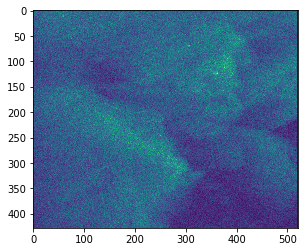

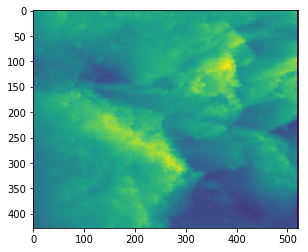

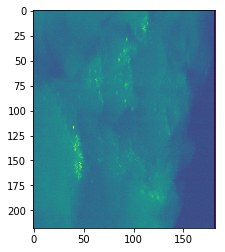

In [43]:
plt.imshow(Al)
plt.show()
plt.imshow(Si)
plt.show()
plt.imshow(Fe)
plt.show()


/Users/costassoler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  # Remove the CWD from sys.path while we load stuff.


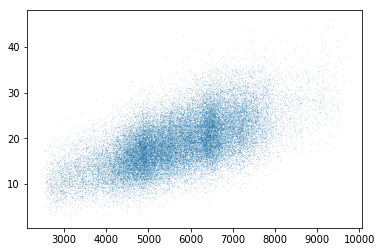

In [44]:
thresh = 0.9
Si_cals = []
Al_cals = []
for i in range (0,int(Fe.shape[0])):
    for j in range(0,Fe.shape[1]):
        if (Fe[i,j]<np.amax(Fe)*.75):
            Al_cals.append(Al[i,j])
            Si_cals.append(Si[i,j])
A = np.vstack([Si_cals, np.ones(len(Si_cals))]).T
m, c = np.linalg.lstsq(A, Al_cals)[0]

Al_noise = Al_cals
for i in range (0,len(Al_cals)):
    Al_noise[i] = Al_noise[i]+np.random.random()
plt.plot(Si_cals,Al_noise,'.',markersize=0.1) #The added bit of noise helps us see "through" 
                                              #the rows of Al counts

In [61]:
Fe_masked = np.zeros((Fe.shape[0],Fe.shape[1]))
Al_masked = np.zeros((Al.shape[0],Al.shape[1]))
thresh = 0.6
for i in range (0,int(Fe.shape[0])):
    for j in range(0,Fe.shape[1]):
        if (Fe[i,j]>np.amax(Fe)*thresh):
            Fe_masked[i,j]=Fe[i,j]

for i in range (4,Fe_masked.shape[0]):
    for j in range(3,Fe_masked.shape[1]):
        if (Fe_masked[i,j]>0):
            Bulk_Fe += (Fe[i,j]*14.96*5/(DT_Fe*X_Ray_Fe))*C_Fe
            Al_i = (5.98*i-18.27)//1
            Al_j = (2*j-4.35)//1
            Al_masked[Al_i,Al_j] = Al[Al_i,Al_j]
        
            
plt.imshow(Fe_masked)
plt.show()
plt.imshow(Fe)
plt.show()
plt.imshow(Al_masked)
plt.show()

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

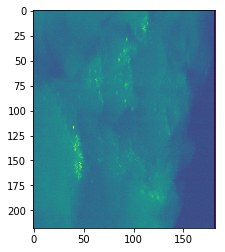

In [48]:
plt.imshow(Fe)

In [65]:
DT_Fe = 40*10**-3
X_Ray_Fe = 1.029435*10**8.000000
DT_Al = 130.000000*10**-3
X_Ray_Al = 1.245558*10**9.301030

thresh = 0.6

Bulk_Al = 0
Bulk_Fe = 0
for i in range (4,Fe.shape[0]):
    for j in range(3,Fe.shape[1]):
        if (Fe[i,j]>thresh*np.amax(Fe)):
            Bulk_Fe += (Fe[i,j]*14.96*5/(DT_Fe*X_Ray_Fe))*C_Fe
            Al_i = int((5.98*i-18.27)//1)
            Al_j = int((2*j-4.35)//1)
        
            b = ((Al[Al_i,Al_j]-(m*Si[Al_i,Al_j]))*2.5*2.5/(DT_Al*X_Ray_Al))*C_Al
        
            Bulk_Al += b
      
       
        

IndexError: index 430 is out of bounds for axis 0 with size 428

In [57]:
Bulk_Al/Bulk_Fe

0.0018226785855089325

In [66]:
Fe.shape

(218, 182)

In [67]:
Al.shape

(428, 521)